<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Machine%20Learning/03_classification/03_gini_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


To install scikit-learn library use command below
Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:

!pip install scikit-learn

In order to update to newest scikit-learn library, use command below

Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:

**!pip install --upgrade scikit-learn**

### Contest:
1. [Import library](#0)
2. [Gini factor](#1)
3. [Entropy ](#2)
4. [Information profit](#3)




### Spis treści:
1. [Import bibliotek](#0)
2. [Wskaznik Giniego](#1)
3. [Entropia](#2)
4. [Zysk informacyjny](#3)




---
### <a name='0'></a> Import bibliotek / Import library

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display  import Image
sns.set(font_scale=1.3)
np.random.seed(42)

### <a name='1'></a> Wskaznik Giniego / Gini factor

Miara zanieczyszczenia
- węzeł jest czysty (wszystkie próbki w węźle należą do tej samej klasy), gdy Gini = 0

$$G_i = 1 - \sum_{k=1}^{n}p_{i,k}^{2}$$

$p_{i, k}$ - współczynnik występowania klas k wśród próbek uczących w $i$-tym węźle

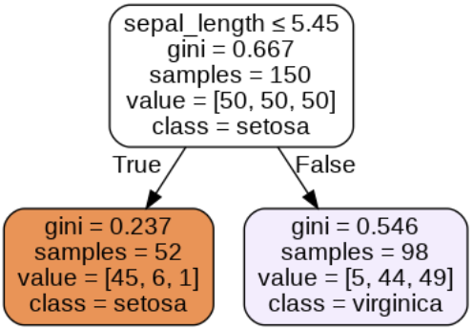

In [6]:
Image('https://storage.googleapis.com/esmartdata-courses-files/ml-course/Picture1.png')

Gini dla korzenia (root) - poziom 0 /Gini for Root - Level 0

In [8]:
1 - (50 / 150)**2 - (50 / 150)**2 - (50 / 150)**2

0.6666666666666665

Poziom 1, węzeł lewy / Level 1, left node /

In [7]:
1 - (45 / 52)**2 - (6 / 52)**2 - (1 / 52)**2

0.23742603550295852

Poziom 1, węzeł prawy /Level 1, right node

In [9]:
1 - (5 / 98)**2 - (44 / 98)**2 - (49 / 98)**2

0.5458142440649729

### <a name='2'></a> Entropia / Entropy

## $$Entropia  = -\sum_{k=1}^{n}p_{i} \cdot log_{2}(p_{i})$$

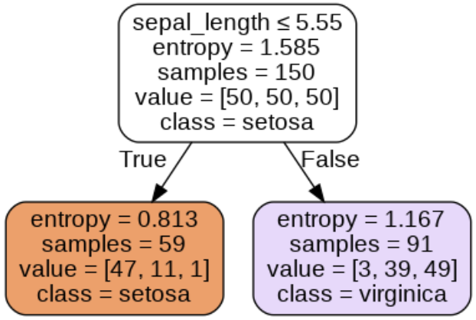

In [10]:
Image('https://storage.googleapis.com/esmartdata-courses-files/ml-course/Picture2.png')

Entropia dla korzenia (root) - poziom 0 /Entropy for root - level 0

In [11]:
-((50 / 150) * np.log2(50 / 150) + (50 / 150) * np.log2(50 / 150) + (50 / 150) * np.log2(50 / 150))

1.584962500721156

Poziom 1, węzeł lewy / Level 1, left node

In [12]:
-((47 / 59) * np.log2(47 / 59) + (11 / 59) * np.log2(11 / 59) + (1 / 59) * np.log2(1 / 59))

0.8128223064150747

Poziom 1, węzeł prawy /Level 1, right node

In [13]:
-((3 / 91) * np.log2(3 / 91) + (39 / 91) * np.log2(39 / 91) + (49 / 91) * np.log2(49/ 91))

1.167065448996099

In [14]:
from scipy.stats import entropy

print(entropy([0.5, 0.5], base=2))
print(entropy([0.8, 0.2], base=2))
print(entropy([0.95, 0.05], base=2))

1.0
0.7219280948873623
0.2863969571159562


In [15]:
def entropy(x):
    return -np.sum(x * np.log2(x))

print(entropy([0.5, 0.5]))
print(entropy([0.8, 0.2]))
print(entropy([0.95, 0.05]))

1.0
0.7219280948873623
0.28639695711595625


In [16]:
p = np.arange(0.01, 1.0, 0.01)
q = 1 - p
pq = np.c_[p,q]
pq[:10]

array([[0.01, 0.99],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.04, 0.96],
       [0.05, 0.95],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.08, 0.92],
       [0.09, 0.91],
       [0.1 , 0.9 ]])

In [17]:
entropies = [entropy(pair) for pair in pq]
entropies[:10]

[0.08079313589591118,
 0.14144054254182067,
 0.1943918578315762,
 0.24229218908241482,
 0.28639695711595625,
 0.32744491915447627,
 0.3659236509002231,
 0.4021791902022728,
 0.43646981706410287,
 0.4689955935892812]

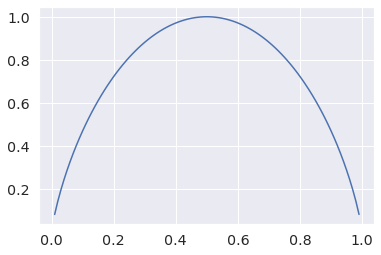

In [18]:
plt.plot(p, entropies)

### Rozważmy dane / Consider data

| ID | Dochód | Liczba osób w gospodarstwie | Wiarygodność | Udzielenie pożyczki |
|----|--------|-----------------------------|--------------|---------------------|
| 1  | niski  | 1                           | niska        | 0                   |
| 2  | niski  | 3                           | niska        | 0                   |
| 3  | średni | 4                           | niska        | 0                   |
| 4  | wysoki | 3                           | średnia      | 0                   |
| 5  | wysoki | 4                           | wysoka       | 1                   |
| 6  | niski  | 4                           | niska        | 0                   |
| 7  | średni | 2                           | średnia      | 1                   |
| 8  | wysoki | 3                           | wysoka       | 1                   |
| 9  | średni | 5                           | niska        | 0                   |
| 10 | średni | 1                           | wysoka       | 1                   |


Rozkład zmiennej Udzienie pożyczki:

| Udzielenie pożyczki | 0    | 1    |
|---------------------|------|------|
| $p_{i}$               | 6/10 | 4/10 |


Wzór na entropię:
###  $E = - \sum_{i=1}^{n}p_{i} \cdot log_{2}p_{i}$

Entropia po podziale:

###  $E_{after}  = \sum_{i=1}^{m} \frac{S_{i}}{S}Entropia(S_{i})$

gdzie 
$S$ - podział
$m$ - liczba podziałów



In [19]:
entropia = -(6/10 * np.log2(6/10) + (4/10) * np.log2(4/10))
entropia

0.9709505944546686

### Rozkład zmiennej `Wiarygodność` / Disctribuation variable - Accurancy

|         | udział | udzielenie pożyczki = 0 | udzielenie pożyczki = 1 |  Entropia
|---------|--------|-------------------------|-------------------------|--------|
| niska   | 5/10   | 1                       | 0                       | 0
| średnia | 2/10   | 1/2                     | 1/2                     | 1
| wysoka  | 3/10   | 0                       | 1                       | 0

Entropia po podziale

In [20]:
entropia_wiarygodnosc = 5/10 * 0 + 2/10 * 1 + 3/10 * 0
entropia_wiarygodnosc

0.2

### Rozkład zmiennej  `Dochód`  / Distribuation variable - Inocome

|        | udział | udzielenie pożyczki = 0 | udzielenie pożyczki = 1 | Entropia
|--------|--------|-------------------------|-------------------------|----------|
| niski  | 3/10   | 1                       | 0                       |0
| sredni | 4/10   | 2/4                     | 2/4                     |1
| wysoki | 3/10   | 1/3                     | 2/3                     | 0.9183

Entropia po podziale

In [21]:
entropia_dochod = 3/10 * 0 + 4/10 * 1 + 3/10 * 0.9183
entropia_dochod

0.67549

### <a name='4'></a> Zysk informacyjny /Information Gain


$IG (Information\ Gain) = Entropia\ przed\ podziałem - Entropia\ po\ podziale$

In [22]:
ig_wiarygodnosc = entropia - entropia_wiarygodnosc
ig_dochod = entropia - entropia_dochod

print('Zysk informacyjny (IG): wiarygodność:', ig_wiarygodnosc)
print('Zysk informacyjny (IG): dochód:', ig_dochod)

Zysk informacyjny (IG): wiarygodność: 0.7709505944546686
Zysk informacyjny (IG): dochód: 0.29546059445466855
